In [1]:
# EPL Injury Analysis (Kaggle Dataset)
### By: Janibek Magmurov

# A project to research injuries in the English Premier League. The aim is to find out which injuries are the most severe, how they relate to player position and which injury categories cause the most downtime.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

#Filepath
research_file = '../data/raw/dataset_of_injuriesResearches.xlsx'
original_kaggle_file = '../data/raw/player_injuries_impact original KAGGLE.xlsx'
edited_kaggle_file = '../data/processed/player_injuries_impact(Edited).xlsx'

#Download Excell-Sheets
df_research = pd.read_excel(research_file)
df_kaggle_original = pd.read_excel(original_kaggle_file)
df_kaggle_edited = pd.read_excel(edited_kaggle_file)

#Creating database in data/processed
engine = create_engine('sqlite:///../data/processed/sql_injuries.db')

#Saving kaggle data to sql_injuries.db
df_kaggle_edited.to_sql('injuries', con = engine, index = False, if_exists = 'replace')

# Sorting data to one type (dd.mm.yy.)
df_kaggle_edited['Date of return'] = pd.to_datetime(
    df_kaggle_edited['Date of return'], 
    format='%d.%m.%Y', 
    errors='coerce'
)

text_cols = ['Position', 'Injury ', 'Injury Category']
for col in text_cols:
    df_kaggle_edited[col] = df_kaggle_edited[col].astype('category')

df_kaggle_edited['Downtime (days)'] = (
    df_kaggle_edited['Date of return'] - df_kaggle_edited['Date of Injury']
).dt.days

# Download of edited Kaggle-Dataset
df = pd.read_excel('../data/processed/player_injuries_impact(Edited).xlsx')

# Filtering: excluding Polytrauma
df_no_poly = df_kaggle_edited[df_kaggle_edited['Injury Category'] != 'Polytrauma']

C:\Users\magmu\AppData\Local\Temp\ipykernel_13352\3859672321.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  downtime_by_injury = df_no_poly.groupby('Injury Category')['Downtime (days)'].mean().sort_values(ascending=False)


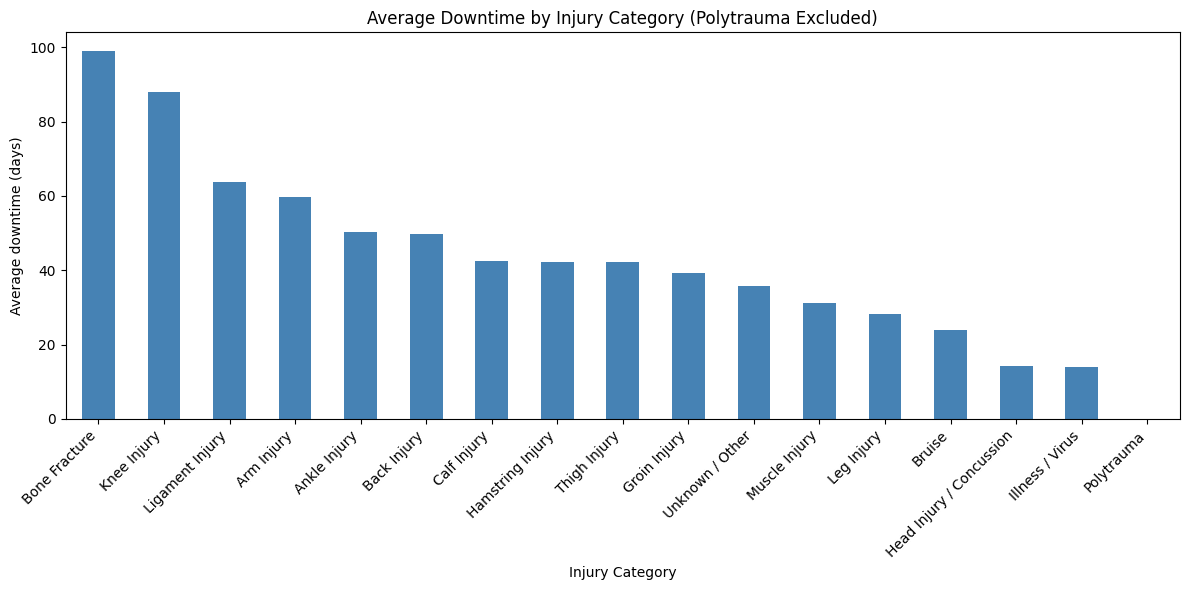

<Figure size 640x480 with 0 Axes>

In [2]:
### Chart 1: Average by Injury Category ###

downtime_by_injury = df_no_poly.groupby('Injury Category')['Downtime (days)'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
downtime_by_injury.plot(kind='bar', color='steelblue')
plt.title('Average Downtime by Injury Category (Polytrauma Excluded)')
plt.ylabel('Average downtime (days)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.savefig('../visualizations/downtime_by_injury.png')

C:\Users\magmu\AppData\Local\Temp\ipykernel_13352\489972345.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  downtime_stats = df_no_poly.groupby('Position')['Downtime (days)'].agg(['mean', 'median']).sort_values(by='mean', ascending=False)


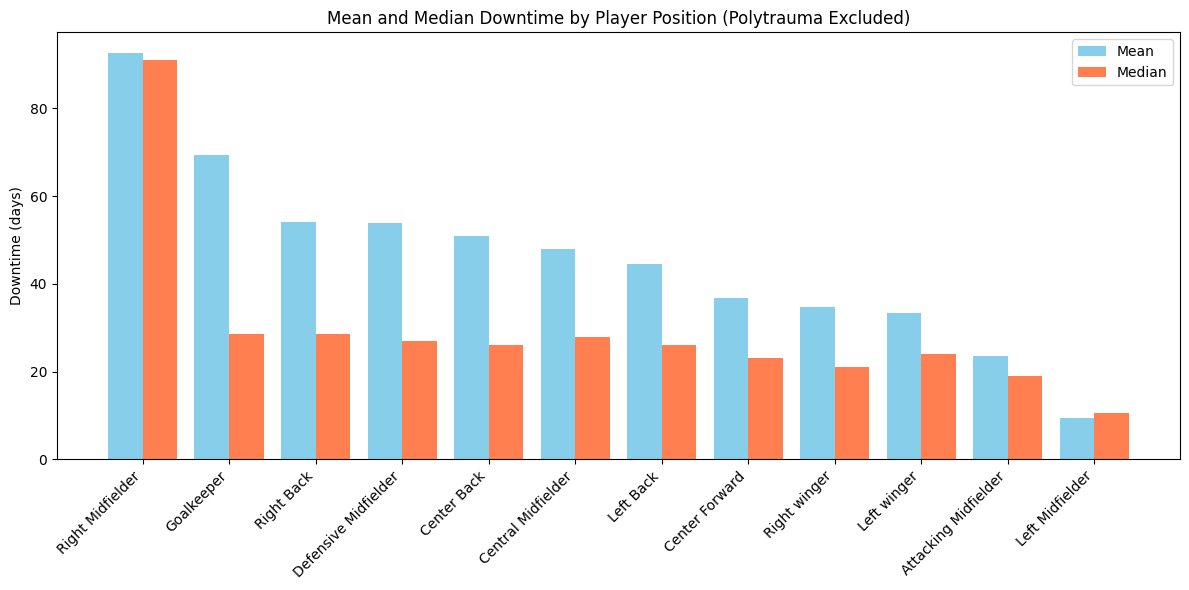

<Figure size 640x480 with 0 Axes>

In [3]:
# Chart 2: Mean and Median by Position

downtime_stats = df_no_poly.groupby('Position')['Downtime (days)'].agg(['mean', 'median']).sort_values(by='mean', ascending=False)

# Reset index to make the 'Position' column a normal column # 
downtime_stats = downtime_stats.reset_index()

plt.figure(figsize=(12,6))
bar_width = 0.4
positions = range(len(downtime_stats))

# Mean
plt.bar([p - bar_width/2 for p in positions], downtime_stats['mean'], width=bar_width, label='Mean', color='skyblue')

# Median
plt.bar([p + bar_width/2 for p in positions], downtime_stats['median'], width=bar_width, label='Median', color='coral')


plt.xticks(positions, downtime_stats['Position'], rotation=45, ha='right')
plt.ylabel('Downtime (days)')
plt.title('Mean and Median Downtime by Player Position (Polytrauma Excluded)')
plt.legend()
plt.tight_layout()
plt.show()

plt.savefig('../visualizations/downtime_by_position_mean_median.png')

C:\Users\magmu\AppData\Local\Temp\ipykernel_13352\160891322.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_no_poly, x='Position', y='Downtime (days)', palette='Set3')


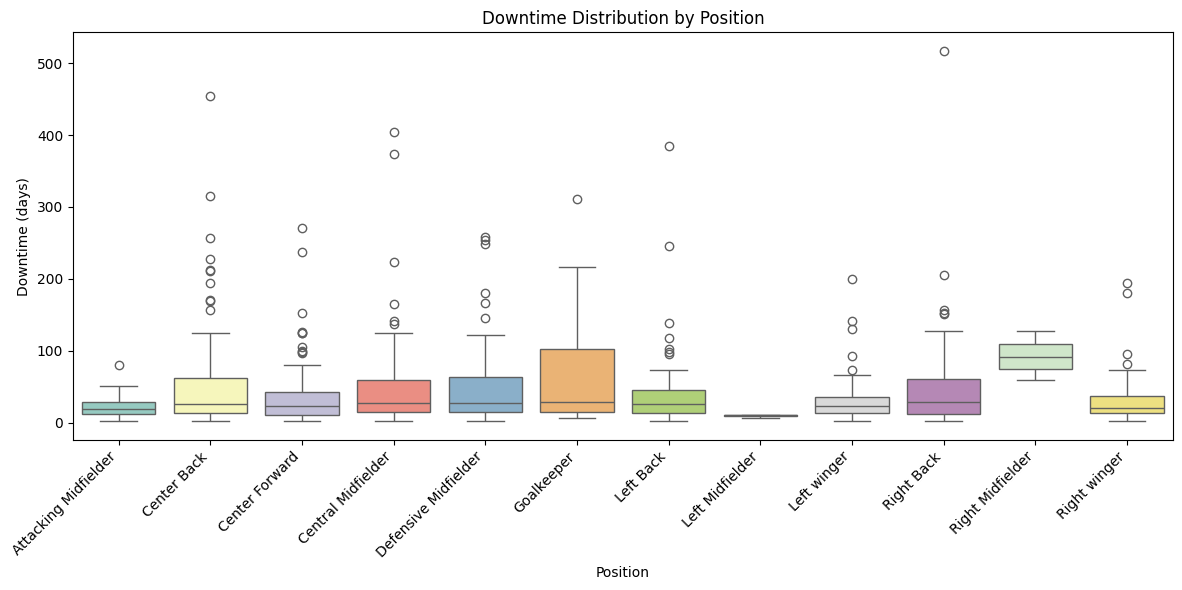

<Figure size 640x480 with 0 Axes>

In [4]:
### Chart 3: Boxplot by Position ###

plt.figure(figsize=(12,6))
sns.boxplot(data=df_no_poly, x='Position', y='Downtime (days)', palette='Set3')
plt.title('Downtime Distribution by Position')
plt.ylabel('Downtime (days)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.savefig('../visualizations/downtime_by_injury.png')

In [6]:
# Conclusions (In Progress)
